# cisc-873-dm-w23-a3
## Fake Reddit Prediction

https://www.kaggle.com/competitions/cisc-873-dm-w23-a3

## Problem Formulation:

**Define the problem:**
- the problem is how are we  going to predict if a specific reddit(website) post is fake news or not

**What is the input:**  
- the input is text that has a lot of rows containing fake news and right news and has some noise needed be cleaned

**What is the output:**
- predict if the news are fake news or True news

**What data mining function is required:**
- data mining function is required  classification problem

**What could be the challenges**
- the challenges are to clean the text data by Preprocessing techniques in NLP to make the sentence pure to predict correctly and choose best classifier for this mission.

**What is the impact:**

- Reducing the spread of rumors and fake news

**What is an ideal solution:**

- the ideal solution is getting high accuracy for predict which fake or true news,and which model perfect to train input text (NLP or text classification) in this proplem randomforest classifier is the best and logestic regresion

# Questions:
🌈 What is the difference between Character n-gram and Word n-gram? Which one tends to suffer more from the OOV issue?

🌈 What is the difference between stop word removal and stemming? Are these techniques language-dependent?

🌈 Is tokenization techniques language dependent? Why?

🌈 What is the difference between count vectorizer and tf-idf vectorizer? Would it be feasible to use all possible n-grams? If not, how should you select them?

#### **What is the difference between Character n-gram and Word n-gram? Which one tends to suffer more from the OOV issue?**

**1-**
* Character N-Grams it is split each words based on character but ` 
 `word N-Grams it is split whole text based on words`
* For a given document in a language, there are more character N-grams repetitions than word n-gram repetitions

 character N-grams split highlights some common properties that a word n-gram split does not

  character N-grams make languages more comparable revealing more repeated

**2-**
* Word n-gram tends to suffer more from OOV (Out-Of-Vocabulary) issue because of the new words that presented in the testing dataset and not appear in training dataset


#### **What is the difference between stop word removal and stemming? Are these techniques language-dependent?**

**1-**
* Stop word removal and stemming are commonly used method in indexing the different between them are 

* Stop word removal Some common words that are present in text but do not contribute in the meaning of a sentence. Such words are not at all important for the purpose of information retrieval or natural language processing. The most common stopwords are ‘the’ and ‘a’.

* Stemming is a technique used to extract the base form of the words by removing affixes from them. It is just like cutting down the branches of a tree to its stems. For example, the stem of the words eating, eats, eaten is eat.

**2-**
* yes, these techniques are language-dependent


#### **Is tokenization techniques language dependent? Why?**

* Tokenization is breaking the raw text into small chunks and helps in interpreting the meaning of the text by analyzing the sequence of the words
so it is language dependent
* because it needs to know meaning of each word to split it depend on language`
`for example: wasn't>> wasnt>>was n't>>wasn t >> these all possable of tokenization but some of these doesn't have meaning in the language 


#### **What is the difference between count vectorizer and tf-idf vectorizer? Would it be feasible to use all possible n-grams? If not, how should you select them?**

**1-**
* TfidfVectorizer and CountVectorizer both are methods for converting text data into vectors as model can process only numerical data.

* In CountVectorizer we only count the number of times a word appears in the document which results in biasing in favour of most frequent words. this ends up in ignoring rare words which could have helped is in processing our data more efficiently.



* In TfidfVectorizer we consider overall document weightage of a word. It helps us in dealing with most frequent words. Using it we can penalize them. TfidfVectorizer weights the word counts by a measure of how often they appear in the documents.

**2-**
* it isn't feasible to use all possible n-grams

N-gram range sets if features to be used to characterize texts will be:
Unigrams or words (n-gram size = 1)
Bigrams or terms compounded by two words (n-gram size = 2)
Trigrams or terms compounded by up to three words (n-gram size = 3)


I should select between them depend on problem like :
Sentiment Analysis, setting n-gram ranges that use bigrams 
or trigrams can dramatically improve the accuracy of classification,
as they can capture more complex expressions formed by the composition of more
than one word. The rationale is that in Sentiment Analysis the outcome depends
not only on the frequency of words but also on how they are combined:
good has a different meaning alone than when preceded by a not as in not good.

Import the libraries that i will use in the competetion

In [1]:
import re
import pickle
import sklearn
import pandas as pd
from pandas.core.frame import DataFrame
import numpy as np
import holoviews as hv
import nltk 
from bokeh.io import output_notebook
output_notebook()
import warnings
warnings.filterwarnings("ignore")
from pathlib import Path
np.random.seed(0)

# some seeting for pandas and hvplot

pd.options.display.max_columns = 100
pd.options.display.max_rows = 300
pd.options.display.max_colwidth = 100
np.set_printoptions(threshold=2000)

In [54]:
from sklearn.model_selection import train_test_split, GridSearchCV , RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer , CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier # to use RandomForestClassifier model for my data
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords #remove the low-level information from our text in order to give more focus to the important

In [3]:
# Read raw data
np.random.seed(1)
data = pd.read_csv("/content/xy_train.csv", sep=",", na_values=[""])
data

,id,text,label
0,265723,"A group of friends began to volunteer at a homeless shelter after their neighbors protested. ""Se...",0
1,284269,"British Prime Minister @Theresa_May on Nerve Attack on Former Russian Spy: ""The government has c...",0
2,207715,"In 1961, Goodyear released a kit that allows PS2s to be brought to heel. https://m.youtube.com/w...",0
3,551106,"Happy Birthday, Bob Barker! The Price Is Right Host on How He'd Like to Be Remembered | ""As the ...",0
4,8584,"Obama to Nation: 聙""Innocent Cops and Unarmed Young Black Men Should Not be Dying Before Magic Jo...",0
...,...,...,...
59995,70046,"Finish Sniper Simo H盲yh盲 during the invasion of Finland by the USSR (1939, colorized)",0
59996,189377,"Nigerian Prince Scam took $110K from Kansas man; 10 years later, he's getting it back",1
59997,93486,Is It Safe To Smoke Marijuana During Pregnancy? You鈥檇 Be Surprised Of The Answer | no,0
59998,140950,Julius Caesar upon realizing that everyone in the room has a knife except him (44 bc),0


## Check for Null values

In [ ]:
data.isnull().sum().sum()

0

There are no null values

## Check for duplicates

In [ ]:
# print the same of duplicates
data.duplicated().sum()

0

There are no duplicates

In [4]:
data.shape

(60000, 3)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      60000 non-null  int64 
 1   text    60000 non-null  object
 2   label   60000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.4+ MB


## Check for Label Distribution

In [ ]:
# display unique label values' counts
data['label'].value_counts()

0    32172
1    27596
2      232
Name: label, dtype: int64

<Axes: >

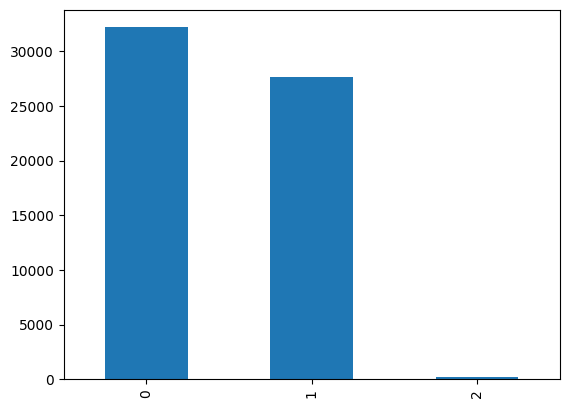

In [5]:
# Match distribution
data['label'].value_counts().plot(kind='bar')

The label values are 0 and 1 only, thus we'll remove all the rows with the label value 2

In [6]:
data.drop(data[(data['label'] == 2)].index, inplace=True)

In [38]:
data['label'].value_counts()

0    32172
1    27596
Name: label, dtype: int64

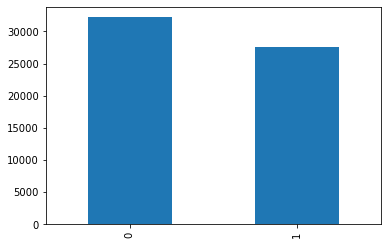

In [ ]:
# Match distribution
data['label'].value_counts().plot(kind='bar')

## Split Data from labels

In [39]:
# remove all columns except rating (target column)
X_train= data.drop(columns=['label', 'id'])

# select only the target column 
y_train= data['label']

In [40]:
X_train.shape, y_train.shape

((59768, 1), (59768,))

In [10]:
X_train.head(2)

,text
0,"A group of friends began to volunteer at a homeless shelter after their neighbors protested. ""Se..."
1,"British Prime Minister @Theresa_May on Nerve Attack on Former Russian Spy: ""The government has c..."


In [11]:
y_train.head(2)

0    0
1    0
Name: label, dtype: int64

## Cleaning and pre processing

## Trial 1
Use pipeline with GridSearch, validation set and logistic regression model with word-level vectorizer. (word analzer)

I expect it to get my high score because logistic regression is a good candidate to solve these kind of problems

**Text clean**

In [12]:
nltk.download('punkt')#download punkt pakages from nltk library
nltk.download('stopwords')#download stopwords pakages from nltk library
# A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore
stemmer = SnowballStemmer(language='english')
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [42]:
def clean_text(text, for_embedding=True):  #will apply embedding 
    """ steps:
        - remove any html tags (< /br> often found)
        - Keep only ASCII + European Chars and whitespace, no digits
        - remove single letter chars
        - convert all whitespaces (tabs etc.) to single wspace
        if not for embedding (but e.g. tdf-idf):
        - all lowercase
        - remove stopwords, punctuation and stemm
    """
    RE_WSPACE = re.compile(r"\s+", re.IGNORECASE)
    RE_TAGS = re.compile(r"<[^>]+>")
    RE_ASCII = re.compile(r"[^A-Za-zÀ-ž ]", re.IGNORECASE)
    RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž]\b", re.IGNORECASE)
    if for_embedding:
        # Keep punctuation
        RE_ASCII = re.compile(r"[^A-Za-zÀ-ž,.!? ]", re.IGNORECASE)
        RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž,.!?]\b", re.IGNORECASE)

    text = re.sub(RE_TAGS, " ", text)
    text = re.sub(RE_ASCII, " ", text)
    text = re.sub(RE_SINGLECHAR, " ", text)
    text = re.sub(RE_WSPACE, " ", text)

    word_tokens = word_tokenize(text)
    words_tokens_lower = [word.lower() for word in word_tokens]

    if for_embedding:
        # no stemming, lowering and punctuation / stop words removal
        words_filtered = word_tokens
    else:
        words_filtered = [
            stemmer.stem(word) for word in words_tokens_lower if word not in stop_words
        ]

    text_clean = " ".join(words_filtered)
    return text_clean

In [43]:
%%time
# Clean Comments
X_train["text_clean"] = X_train.loc[X_train["text"].str.len() > 20, "text"]
X_train["text_clean"] = X_train["text_clean"].map(
    lambda x: clean_text(x, for_embedding=True) if isinstance(x, str) else x
)

CPU times: user 11.3 s, sys: 25 ms, total: 11.3 s
Wall time: 11.3 s


In [44]:
X_train.head(2)

,text,text_clean
0,"A group of friends began to volunteer at a homeless shelter after their neighbors protested. ""Se...",group of friends began to volunteer at homeless shelter after their neighbors protested . Seeing...
1,"British Prime Minister @Theresa_May on Nerve Attack on Former Russian Spy: ""The government has c...",British Prime Minister Theresa May on Nerve Attack on Former Russian Spy The government has conc...


In [45]:
X_train=X_train['text_clean']#define variable by new data that cleaned 
data_train = DataFrame(X_train)#just show data by dataframe

### Feature creation with TF-IDF


In [17]:
"""
TF-IDF are word frequency scores that try to highlight words that are more interesting
Compute unique word vector with frequencies
exclude very uncommon (<10 obsv.) and common (>=30%) words
use pairs of two words (ngram)
"""
vectorizer = TfidfVectorizer(
    analyzer="word", max_df=0.3, min_df=10, ngram_range=(1, 2), norm="l2"
)
vectorizer.fit(X_train)

TfidfVectorizer(max_df=0.3, min_df=10, ngram_range=(1, 2))

In [18]:
X_train_transformed = vectorizer.transform(X_train)#apply transform

In [19]:
print('X_train_transformed', X_train_transformed.shape)
print('y_train', y_train.shape)

X_train_transformed (59768, 21026)
y_train (59768,)


In [ ]:
# Vector representation of vocabulary
word_vector = pd.Series(vectorizer.vocabulary_).sample(5, random_state=1)
print(f"Unique word (ngram) vector extract:\n\n {word_vector}")

Unique word (ngram) vector extract:

 wipe              20467
of medical        11879
my grandfather    11148
can someone        2715
crop               3940
dtype: int64


In [ ]:
%%time
#use pipline and gridsearch to tuning hyperparameter 
pipe_Log_reg =  Pipeline([("Log_reg", LogisticRegression())])
params = {
          'Log_reg__penalty': ['l2'], #l2 regularization
          'Log_reg__C' : [0.6,0.9,1,1.3],#The parameter C is the the inverse of regularization strength in Logistic Regression
          'Log_reg__class_weight': ['balanced',None],
          'Log_reg__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
          }
param_grid  = GridSearchCV(
    pipe_Log_reg, params, cv=5, verbose=1, n_jobs=2, 
    scoring='roc_auc')
#fit X_train and y_train
param_grid.fit(X_train_transformed,y_train)
#print best score
print(f'Best_score = {param_grid.best_score_}')
#print best Params
print(f'Best_params = {param_grid.best_params_}')

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best_score = 0.8881015835980843
Best_params = {'Log_reg__C': 1.3, 'Log_reg__class_weight': 'balanced', 'Log_reg__penalty': 'l2', 'Log_reg__solver': 'saga'}
CPU times: total: 3.84 s
Wall time: 2min 7s


## Test

In [26]:
df = pd.read_csv("/content/x_test.csv")
df.head(2)

,id,text
0,0,stargazer
1,1,yeah


In [27]:
data_test=df.copy()#copy data from original file 
data_test=data_test.drop(['id'],axis=1)#drop id columns 

In [28]:
%%time
# Clean Comments
data_test["text_clean"] = data_test.loc[data_test["text"].str.len() > 0, "text"]
data_test["text_clean"] = data_test["text_clean"].map(
    lambda x: clean_text(x, for_embedding=True) if isinstance(x, str) else x
)

CPU times: user 6.99 s, sys: 13.4 ms, total: 7 s
Wall time: 7.08 s


In [29]:
X_test=data_test['text_clean']#assign the new data to variable
DataFrame(X_test)#just show the data 

,text_clean
0,stargazer
1,yeah
2,PD Phoenix car thief gets instructions from YouTube video
3,"As Trump Accuses Iran , He Has One Problem His Own Credibility"
4,Believers Hezbollah
...,...
59146,Bicycle taxi drivers of New Delhi
59147,Trump blows up GOP formula for winning House races
59148,"Napoleon returns from his exile on the island of Elba . March , Colourised"
59149,Deep down he always wanted to be ballet dancer


## Test data to submit

In [30]:
X_test_transformed = vectorizer.transform(X_test)#apply vectorization on test data 

In [31]:
print('X_test_transformed', X_test_transformed.shape)#check shape of test data 

X_test_transformed (59151, 21026)


In [ ]:
y_pred = param_grid.predict_proba(X_test_transformed)#predict yhat

In [ ]:
submission = pd.DataFrame()

submission['id'] = df['id']

submission['label'] = y_pred[:,1]

submission.to_csv('1submission.csv', index=False)

## Observation:

In Trial 1 we used The Logistic Regression model with Grid Search .

Best_score from Grid Search = 0.8881011444182029

Best_params = {'Log_reg__C': 1.3, 'Log_reg__class_weight': 'balanced', 'Log_reg__penalty': 'l2', 'Log_reg__solver': 'liblinear'}

Also i cleaned the data and removed stopword, used TfidfVectorizer analyzer word, And I applied for_embedding=True

Public Score on kaggle : 0.8564

AS i ecpected it got me a very good score.

************************

## Trial 2
Use the same technique word analyzer (TF-IDF) with xgboost and Grid Search with cross validation

I expect it to gor me a good score too because xgboost is a very good model to solve machine learning problems

In [ ]:
xgb = XGBClassifier(scale_pos_weight=1, 
                      colsample_bytree = 0.4,
                      learning_rate=0.02,
                       max_depth=11,
                      n_estimators=900,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      reg_alpha = 0.3,
                    )
full_pipline1 = Pipeline(
    steps=[
        ('my_classifier', xgb,)
    ]
)
full_pipline1

Pipeline(steps=[('my_classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.4, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.02,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=11, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=900,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [ ]:
full_pipline1 = full_pipline1.fit(X_train_transformed,y_train)    

In [ ]:
# here we specify the search space
param_grid = {
      'my_classifier__n_estimators': [700,900],     
       'my_classifier__max_depth':[8,11] ,
     
}
# cv=10 means ten-fold cross-validation

grid_search = GridSearchCV(
    full_pipline1, param_grid, cv=5, verbose=1, n_jobs=2, 
    scoring='roc_auc')

grid_search.fit(X_train_transformed, y_train)
print('best score {}'.format(grid_search.best_score_))
print('best score {}'.format(grid_search.best_params_))

Fitting 10 folds for each of 4 candidates, totalling 40 fits
best score 0.8603125418671764
best score {'my_classifier__max_depth': 11, 'my_classifier__n_estimators': 900}


## Test data to Submit

In [ ]:
print('X_test_transformed', X_test_transformed.shape)#check shape of test data 

X_test_transformed (59151, 21026)


In [ ]:
y_pred = grid_search.predict_proba(X_test_transformed)#predict yhat

submission = pd.DataFrame()

submission['id'] = df['id']

submission['label'] = y_pred[:,1]

submission.to_csv('2submission.csv', index=False)

## Observation:

In Trial 2 we used xgboost model with Grid Search .

Best_score from Grid Search = 0.8881011444182029

Best_params = {'Log_reg__C': 1.3, 'Log_reg__class_weight': 'balanced', 'Log_reg__penalty': 'l2', 'Log_reg__solver': 'liblinear'}

Also i cleaned the data and removed stopword, used TfidfVectorizer analyzer word, And I applied for_embedding=True

Public Score on kaggle : 0.82214

I expect more than that , this is not a very good result. Let's try different techniques.

# Trial 3
We will use Bag of Words technique (CountVectorizer) with Logistic Regression model with Grid search
* N-grams (sets of consecutive words), N=2
* Min_df ignores terms that have a document frequency (presence in % of documents).
* min_df is used to limit the vocabulary size, so it learns only those terms that appear in at least 10%, 20%, etc. of the documents
*When building the vocabulary, it ignores terms that have a document frequency strictly higher than the given threshold. This could be used to exclude terms that are too frequent and are unlikely to help predict the label.
* Max_features :Limit the amount of features (vocabulary) that the vectorizer will learn

Bag of words is s good technique but i think TfidfVectorizer should give a better result than it.

I expect the result not to be that good.

In [20]:
# Initialize a CountVectorizer object: count_vectorizer
Count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                  ngram_range=(1, 2),max_df=0.3, min_df=10, max_features=None,strip_accents='unicode',token_pattern=r'\w{2,}')

In [21]:
# Transforms the data into a bag of words
Count_train = Count_vec.fit(X_train)
X_train_trans= Count_vec.transform(X_train)

In [22]:
print('X_train_transformed', X_train_trans.shape)
print('y_train', y_train.shape)

X_train_transformed (59768, 11393)
y_train (59768,)


In [23]:
%%time
pipe_Log_reg =  Pipeline([("Log_reg", LogisticRegression())])
params = {
          'Log_reg__penalty': ['l2'],
          'Log_reg__C' : [0.8],
          'Log_reg__class_weight': ['balanced',None],
          'Log_reg__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
          }
param_grid  = GridSearchCV(
    pipe_Log_reg, params, cv=10, verbose=1, n_jobs=2, 
    scoring='roc_auc')
#fit X_train and y_train
param_grid.fit(X_train_trans,y_train)
print(f'Best_score = {param_grid.best_score_}')
print(f'Best_params = {param_grid.best_params_}')

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best_score = 0.8674246772456018
Best_params = {'Log_reg__C': 0.8, 'Log_reg__class_weight': 'balanced', 'Log_reg__penalty': 'l2', 'Log_reg__solver': 'newton-cg'}
CPU times: user 2.41 s, sys: 1.63 s, total: 4.04 s
Wall time: 1min 33s


## Test data to Submit

In [32]:
X_test=data_test['text_clean']
X_test_trans= Count_vec.transform(X_test)
print('X_train_transformed', X_test_trans.shape)

X_train_transformed (59151, 11393)


In [33]:
y_pred2=param_grid.predict_proba(X_test_trans)
#prediction file
submission = pd.DataFrame()

submission['id'] = df['id']

submission['label'] = y_pred2[:,1]

submission.to_csv('3submission.csv', index=False)

# Observation

I used Bag of Words technique (CountVectorizer) with Logistic Regression model with Grid search

As i expected the result is not that good:

Got me a 0.74172 as a public score on kaggle.

## Trial 4
Adding ways to preprocess the data in addition to TfidfVectorizer with GradientBoostingClassifier with Grid Search

The result should be in the middle point, not that good but also not that bad.

In [46]:
data_train.head(2)

,text_clean
0,group of friends began to volunteer at homeless shelter after their neighbors protested . Seeing...
1,British Prime Minister Theresa May on Nerve Attack on Former Russian Spy The government has conc...


In [47]:
import time
start_time=time.time()
# remove '\\n'
data_train['clean_text'] = data_train['text_clean'].map(lambda x: re.sub('\\n',' ',str(x)))
# remove any text starting with User... 
data_train['clean_text'] = data_train['text_clean'].map(lambda x: re.sub("\[\[User.*",'',str(x)))
# remove IP addresses or user IDs
data_train['clean_text'] = data_train['text_clean'].map(lambda x: re.sub("\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}",'',str(x)))
#remove http links in the text
data_train['clean_text'] = data_train['text_clean'].map(lambda x: re.sub("(http://.*?\s)|(http://.*)",'',str(x)))
end_time=time.time()
print("total time",end_time-start_time)

total time 0.598578691482544


In [48]:
data_train.head(2)

,text_clean,clean_text
0,group of friends began to volunteer at homeless shelter after their neighbors protested . Seeing...,group of friends began to volunteer at homeless shelter after their neighbors protested . Seeing...
1,British Prime Minister Theresa May on Nerve Attack on Former Russian Spy The government has conc...,British Prime Minister Theresa May on Nerve Attack on Former Russian Spy The government has conc...


In [49]:
X_train=data_train['clean_text'] 

In [50]:
# Instantiate the vectorizer
vectorizer = TfidfVectorizer(
    analyzer="char", max_df=0.3, min_df=8, ngram_range=(1, 2), norm="l2",token_pattern=r'\w{1,}',stop_words='english')

In [51]:
# fit and transform on it the training features
vectorizer.fit(X_train)
X_train_word_features =vectorizer.transform(X_train)

In [52]:
print('X_train_transformed', X_train_word_features.shape)
print('y_train', y_train.shape)

X_train_transformed (59768, 667)
y_train (59768,)


In [55]:
%%time
pipe_Log_reg =  Pipeline([("Log_reg", GradientBoostingClassifier())])
params = {
          'Log_reg__min_samples_split': [400,500],
          'Log_reg__max_features' : ['sqrt'],
          'Log_reg__max_depth': [11,13]          }
param_grid  = GridSearchCV(
    pipe_Log_reg, params, cv=10, verbose=1, n_jobs=2, 
    scoring='roc_auc')
#fit X_train and y_train
param_grid.fit(X_train_word_features,y_train)
print(f'Best_score = {param_grid.best_score_}')
print(f'Best_params = {param_grid.best_params_}')

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best_score = 0.76701201277468
Best_params = {'Log_reg__max_depth': 13, 'Log_reg__max_features': 'sqrt', 'Log_reg__min_samples_split': 500}
CPU times: user 19.3 s, sys: 309 ms, total: 19.6 s
Wall time: 7min 59s


## Test data to Submit

In [56]:
import time
start_time=time.time()
# remove '\\n'
data_test['clean_text'] = data_test['text_clean'].map(lambda x: re.sub('\\n',' ',str(x)))
# remove any text starting with User... 
data_test['clean_text'] = data_test['text_clean'].map(lambda x: re.sub("\[\[User.*",'',str(x)))
# remove IP addresses or user IDs
data_test['clean_text'] = data_test['text_clean'].map(lambda x: re.sub("\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}",'',str(x)))
#remove http links in the text
data_test['clean_text'] = data_test['text_clean'].map(lambda x: re.sub("(http://.*?\s)|(http://.*)",'',str(x)))
end_time=time.time()
print("total time",end_time-start_time)

total time 0.3256227970123291


In [57]:
X_test=data_test['clean_text'] 
X_test_word_features = vectorizer.transform(X_test)
print('X_test_transformed', X_test_word_features.shape)

X_test_transformed (59151, 667)


In [58]:
y_pred3=param_grid.predict_proba(X_test_word_features)
submission = pd.DataFrame()

submission['id'] = df['id']

submission['label'] = y_pred3[:,1]

submission.to_csv('4submission.csv', index=False)

# Observation:

Didn't see that coming, it also gets a very bad result on the publics score: 0.7413

# Trial 5

TfidfVectorizer with LogisticRegression with RandomizedSearchCV

It should get me a good result as we use logistic regression with TfidfVectorizer

In [69]:
%%time
# n_jobs=2 means the cucurrent number of jobs
# scoring depends on roc_auc
# i used n_iter=10 

pipe= Pipeline([("tfidf", TfidfVectorizer(analyzer='word')),
        ('Log_reg', LogisticRegression()
        )])
param_grid = {
          'Log_reg__penalty': ['l2'], #l2 regularization
          'Log_reg__C' : [0.6,0.9,1],#The parameter C is the the inverse of regularization strength in Logistic Regression
          'Log_reg__class_weight': ['balanced',None],
          'Log_reg__solver': ['newton-cg', 'lbfgs', 'liblinear']
          }


random = RandomizedSearchCV(
    pipe, param_grid, cv=2, verbose=1, n_jobs=2, 
    # number of random trials
    n_iter=10,
    scoring='roc_auc')

# fit Random_search
random.fit(X_train, y_train)

# print best_score and best_params for Random_search
print('best score {}'.format(random.best_score_))
print('best score {}'.format(random.best_params_))

Fitting 2 folds for each of 10 candidates, totalling 20 fits
best score 0.8610331713831172
best score {'Log_reg__solver': 'lbfgs', 'Log_reg__penalty': 'l2', 'Log_reg__class_weight': 'balanced', 'Log_reg__C': 1}
CPU times: user 3.94 s, sys: 2.77 s, total: 6.71 s
Wall time: 35.5 s


## Test data to Submit

In [70]:
X_test=data_test['text_clean'] 
y_pred5=random.predict_proba(X_test)
submission = pd.DataFrame()

submission['id'] = df['id']

submission['label'] = y_pred5[:,1]

submission.to_csv('5submission.csv', index=False)

# Observation

As i expected it got me a good result on public score on kaggle: 0.85677 and this is my best for this competetion as a public score.

# Thank You